### Vamos a practicar

Para esta practica vamos a usar un conjunto de datos de la revista *wine magazine*,
donde revisan una cantidad bastante sorprendente de vinos.

Una descripción de la base de datos la encuentras [aquí](https://www.kaggle.com/zynicide/wine-reviews).
Para no tener que descargar los datos a mano, se anexa la dirección `url` de donde se pueden descargar.

Es importante notr que la primer columna del archivo `csv` es el índice (usar `index_col=0` cuando se descargue el archivo con `pd.read_csv`).

Una vez descargado, usar pandas para las siguientes tareas:

1. ¿Cuantas variables tiene el dataframe? ¿Qué variables tienen valores perdidos? ¿Qué variables son numéricas? ¿Qué variables son cualitativas?
2. Hacer un dataframe con únicamente vinos europeos.
3. ¿Cuál es el menor, el mayor y el precio promedio de la botella por país? ¿De que país es la botella de menor precio?
4. ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
5. ¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
6. Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares.
7. ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?


In [11]:
import pandas as pd

In [2]:
winmag_url = 'https://gist.githubusercontent.com/clairehq/79acab35be50eaf1c383948ed3fd1129/raw/407a02139ae1e134992b90b4b2b8c329b3d73a6a/winemag-data-130k-v2.csv'
df = pd.read_csv(winmag_url)

Número de variables: 14
Variables con valores perdidos: ['country', 'designation', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle']
Variables numéricas: ['Unnamed: 0', 'points', 'price']
Variables cualitativas: ['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


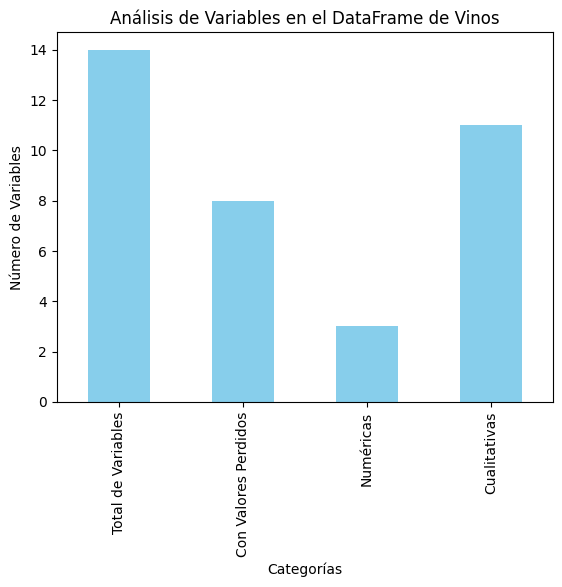

In [12]:
# ¿Cuántas variables tiene el DataFrame?
num_variables = df.shape[1]
print("Número de variables:", num_variables)

# ¿Qué variables tienen valores perdidos?
valores_perdidos = df.columns[df.isnull().any()].tolist()
num_valores_perdidos = len(valores_perdidos)
print("Variables con valores perdidos:", valores_perdidos)

# ¿Qué variables son numéricas?
variables_numericas = df.select_dtypes(include=['number']).columns.tolist()
num_variables_numericas = len(variables_numericas)
print("Variables numéricas:", variables_numericas)

# ¿Qué variables son cualitativas?
variables_cualitativas = df.select_dtypes(include=['object']).columns.tolist()
num_variables_cualitativas = len(variables_cualitativas)
print("Variables cualitativas:", variables_cualitativas)

# Preparar los datos para el gráfico
data = {
    'Categoría': ['Total de Variables', 'Con Valores Perdidos', 'Numéricas', 'Cualitativas'],
    'Cantidad': [num_variables, num_valores_perdidos, num_variables_numericas, num_variables_cualitativas]
}

df_grafico = pd.DataFrame(data)

# Crear el gráfico de barras utilizando Pandas
df_grafico.plot(kind='bar', x='Categoría', y='Cantidad', legend=False, color='skyblue', title='Análisis de Variables en el DataFrame de Vinos')

# Mostrar el gráfico
plt.xlabel('Categorías')
plt.ylabel('Número de Variables')
plt.show()

In [18]:
# Hacer un dataframe con únicamente vinos europeos.
paises_eu = ['Italy', 'Portugal', 'Spain', 'France', 'Germany', 'Austria', 'Hungary', 'Greece', 'Romania', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg', 'Croatia', 'Georgia', 'England', 'Serbia', 'Moldova', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia']

df_europeo = df[df['country'].isin(paises_eu)]

# Mostrar las primeras filas del nuevo DataFrame para verificar
display(df_europeo)

# Opcional: mostrar el número de filas y columnas en el DataFrame europeo
print(f"El DataFrame europeo tiene {df_europeo.shape[0]} filas y {df_europeo.shape[1]} columnas.")


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65486,65486,France,"Closed up and firm with a hint of vanilla, hon...",Domaine Long-Depaquit Les Bougnons Premier Cru,90,NaN,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Albert Bichot 2005 Domaine Long-Depaquit Les B...,Chardonnay,Albert Bichot
65491,65491,France,"A big, toasty wine, full of ripe, delicious fr...",Fourchaume Vieilles Vignes Premier Cru,90,36.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Pascal Bouchard 2006 Fourchaume Vieilles Vigne...,Chardonnay,Pascal Bouchard
65492,65492,France,"A rounded, fruity wine, packed with yellow pea...",Mont-de-Milieu Premier Cru,90,30.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2005 Mont-de-Milieu Premier Cr...,Chardonnay,Simonnet-Febvre
65494,65494,France,Made from young vines from the Vaulorent porti...,Fourchaume Premier Cru,90,45.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,William Fèvre 2005 Fourchaume Premier Cru (Ch...,Chardonnay,William Fèvre


El DataFrame europeo tiene 30945 filas y 14 columnas.


Menor, mayor y precio promedio de la botella por pais:
                   country   min     max       mean
0                Argentina   4.0   230.0  23.604663
1                  Armenia  14.0    14.0  14.000000
2                Australia   6.0   850.0  35.786701
3                  Austria   7.0   150.0  30.846774
4   Bosnia and Herzegovina  13.0    13.0  13.000000
5                   Brazil  10.0    45.0  23.185185
6                 Bulgaria   8.0    55.0  14.014706
7                   Canada  12.0   120.0  35.575472
8                    Chile   5.0   400.0  21.021544
9                  Croatia  13.0    65.0  25.000000
10                  Cyprus  11.0    21.0  16.000000
11          Czech Republic  15.0    45.0  23.666667
12                 England  25.0    80.0  51.636364
13                  France   5.0  2500.0  41.577949
14                 Georgia   9.0    40.0  18.270270
15                 Germany   5.0   775.0  40.592233
16                  Greece   8.0    79.0  21.845188
17       

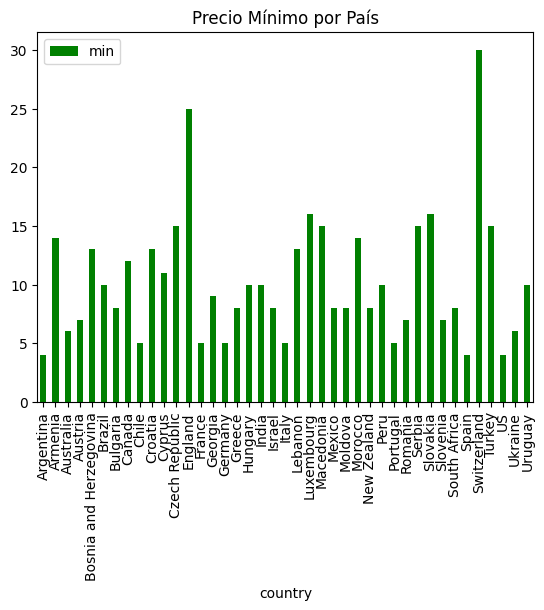

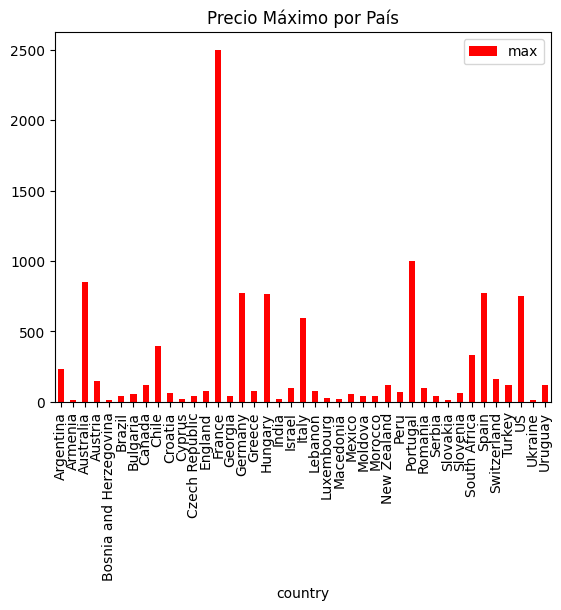

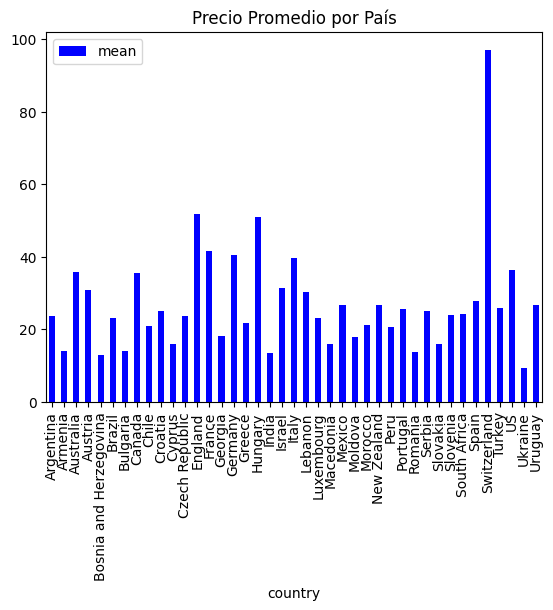

In [19]:
# ¿Cuál es el menor, el mayor y el precio promedio de la botella por país?
# Calcular el menor, mayor y precio promedio por país
precio_por_pais = df.groupby('country')['price'].agg(['min', 'max', 'mean']).reset_index()

print("Menor, mayor y precio promedio de la botella por pais:")
print(precio_por_pais)
# ¿De que país es la botella de menor precio?
pais_menor_precio = df.loc[df['price'].idxmin(), 'country']
botella_menor_precio = df['price'].min()

print(f"\nEl pais con la botella de menor precio es {pais_menor_precio} con un precio de {botella_menor_precio}")

precio_por_pais.plot(kind='bar', x='country', y='min', color='green', title='Precio Mínimo por País')

# Gráfico de barras para el precio máximo por país
precio_por_pais.plot(kind='bar', x='country', y='max', color='red', title='Precio Máximo por País')

# Gráfico de barras para el precio promedio por país
precio_por_pais.plot(kind='bar', x='country', y='mean', color='blue', title='Precio Promedio por País')

# Mostrar información del país con la botella de menor precio
print(f"\nEl país con la botella de menor precio es {pais_menor_precio} con un precio de {botella_menor_precio}")

In [ ]:
# ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
palabras_snobs = ['elegant', 'nuance', 'minerality', 'hint', 'structure', 'balance', 'complexity', 'oak', 'tannins', 'acidity', 'finish']

def tiene_palabras_snobs(description):
    return any(palabra in description for palabra in palabras_snobs)

df['snob'] = df['description'].apply(tiene_palabras_snobs)

num_vinos_snobs = df['snob'].sum()

print(f"Número de vinos con consideraciones 'snobs' en la descripción: {num_vinos_snobs}")

Número de vinos con consideraciones 'snobs' en la descripción: 51211


In [ ]:
# ¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
# Contar cuántas designaciones diferentes hay
num_designaciones_diferentes = df['designation'].nunique()

# Encontrar la designación más repetida y cuántas veces se repite
mas_repetida = df['designation'].value_counts().idxmax()
cantidad = df['designation'].value_counts().max()

# Resultados
print(f"Número de designaciones diferentes: {num_designaciones_diferentes}")
print(f"La designación más repetida es: {mas_repetida}")
print(f"Se repite {cantidad} veces")


Número de designaciones diferentes: 24187
La designación más repetida es: Reserve
Se repite 999 veces


              variety   country  price
1      Portuguese Red  Portugal   15.0
2          Pinot Gris        US   14.0
3            Riesling        US   13.0
5  Tempranillo-Merlot     Spain   15.0
6            Frappato     Italy   16.0


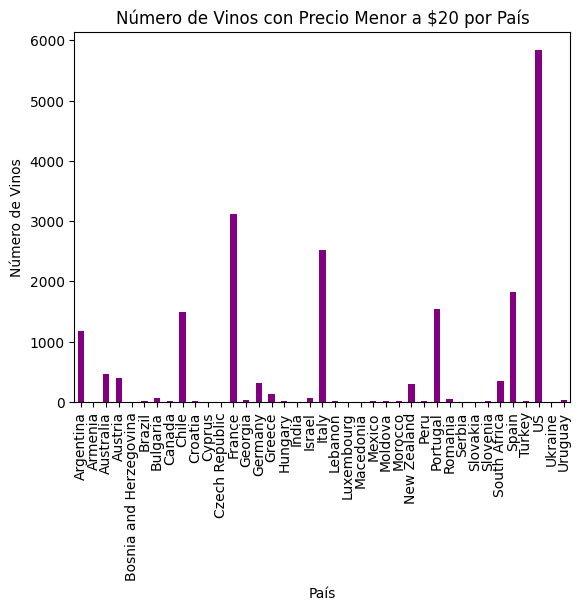

In [20]:
# Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares
vinos_menor_20 = df[df['price'] < 20]
df_vinos_menor_20 = vinos_menor_20[['variety', 'country', 'price']]
print(df_vinos_menor_20.head())

# Crear un gráfico de barras para mostrar la distribución de precios de estos vinos por país
df_vinos_menor_20.groupby('country')['price'].count().plot(kind='bar', color='purple', title='Número de Vinos con Precio Menor a $20 por País')

# Mostrar el gráfico
plt.xlabel('País')
plt.ylabel('Número de Vinos')
plt.show()

In [ ]:
# ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?
# Filtrar los vinos de la variedad 'Pinot Noir'
pinot_noir_vinos = df[df['variety'] == 'Pinot Noir']

# Contar cuántos vinos de Pinot Noir hay por cada país
pinot_noir_por_pais = pinot_noir_vinos['country'].value_counts()

# Mostrar el resultado
print(pinot_noir_por_pais)

country
US              4918
France          1001
New Zealand      281
Chile            184
Australia         58
Austria           51
Argentina         46
Germany           31
South Africa      21
Bulgaria           9
Canada             8
Romania            8
Portugal           7
Spain              6
Israel             5
England            5
Italy              4
Uruguay            3
Slovenia           3
Switzerland        2
Brazil             2
Croatia            1
Name: count, dtype: int64
